# Task 2 – Model Building and Training


In [3]:
import sys
from pathlib import Path

# Current working directory
print("CWD:", Path().resolve())

# Correct project root (ONE level up from notebooks)
PROJECT_ROOT = Path().resolve().parent

print("Project root:", PROJECT_ROOT)

sys.path.insert(0, str(PROJECT_ROOT))


CWD: C:\Users\Josh\Desktop\fraud-detection\notebooks
Project root: C:\Users\Josh\Desktop\fraud-detection


In [4]:
DATA_PATH = PROJECT_ROOT / "data" / "raw data" / "creditcard.csv"
credit_df = load_csv(DATA_PATH)


NameError: name 'load_csv' is not defined

In [ ]:
print(credit_df.shape)
credit_df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Define target and features
target = "Class"

X = credit_df.drop(columns=[target])
y = credit_df[target]

print("Features shape:", X.shape)
print("Target distribution:")
print(y.value_counts(normalize=True))


Features shape: (284807, 30)
Target distribution:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest target distribution:")
print(y_test.value_counts(normalize=True))


Train target distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Test target distribution:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed.")


Scaling completed.


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression trained.")


Logistic Regression trained.


AUC-PR: 0.7190
F1-score: 0.1144


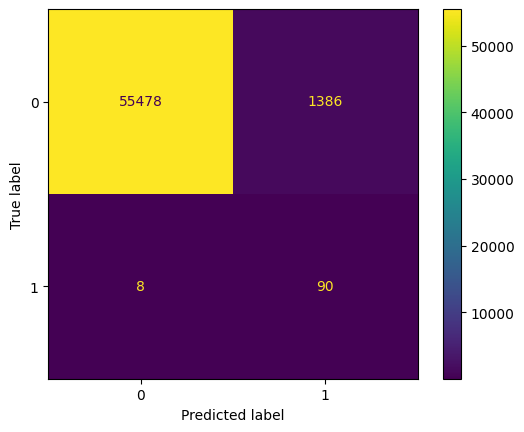

In [ ]:
from sklearn.metrics import (
    average_precision_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Metrics
auc_pr = average_precision_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

print(f"AUC-PR: {auc_pr:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

print("Random Forest trained.")


Random Forest trained.


Random Forest AUC-PR: 0.8589
Random Forest F1-score: 0.8457


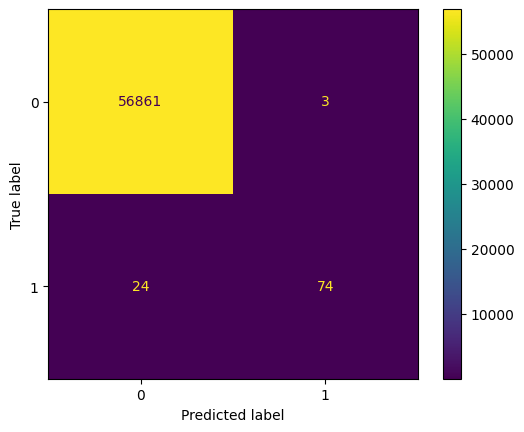

In [ ]:
# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
auc_pr_rf = average_precision_score(y_test, y_proba_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest AUC-PR: {auc_pr_rf:.4f}")
print(f"Random Forest F1-score: {f1_rf:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "auc_pr": "average_precision",
    "f1": "f1"
}

cv_results = cross_validate(
    rf,
    X,
    y,
    cv=skf,
    scoring=scoring,
    n_jobs=1
)


print("Random Forest CV Results:")
print(f"AUC-PR: {cv_results['test_auc_pr'].mean():.4f} ± {cv_results['test_auc_pr'].std():.4f}")
print(f"F1-score: {cv_results['test_f1'].mean():.4f} ± {cv_results['test_f1'].std():.4f}")


Random Forest CV Results:
AUC-PR: 0.8524 ± 0.0259
F1-score: 0.8507 ± 0.0226
